## Titanic Exploratory Data Analysis (EDA)

In [2]:
# Import requried libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = sns.load_dataset("titanic")

In [5]:
# Show head of your data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Cleaning

In [6]:
# Show info of your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Discribe of your data
describe_data = df.describe()
print(describe_data)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
# Find shape of data
df.shape

(891, 15)

In [9]:
# Find missing values of your data.
missing_values = df.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
# Group-wise Median Imputation of your age column
df["age"] = df.groupby(["pclass","sex"])["age"].transform(lambda x: x.fillna(x.median()))

In [11]:
# Fill values in embarked column of mode 
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [12]:
# Drope deck column
df.drop(columns = ["deck"], inplace = True)

In [13]:
# Fill values in embark_town of mode
mode_value = df["embark_town"].mode()[0]
df["embark_town"] = df["embark_town"].fillna(mode_value)

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [64]:
# Find duplicate values of your data
duplicate_values = df.duplicated().sum()
print(duplicate_values)

118


In [65]:
# Print only duplicates values
only_duplicates = df[df.duplicated()]
print(only_duplicates)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female  21.5      0      0   7.7500        Q   Third   
64          0       1    male  40.0      0      0  27.7208        C   First   
76          0       3    male  25.0      0      0   7.8958        S   Third   
77          0       3    male  25.0      0      0   8.0500        S   Third   
87          0       3    male  25.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male  25.0      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male  embark_town alive  alone  


In [66]:
# Drop duplicates values in your data
df.drop_duplicates(inplace = True)

In [67]:
# Again check your data size
df.shape

(773, 14)

## Data Visualization

***1. Survival Count Overall using Count_Plot***

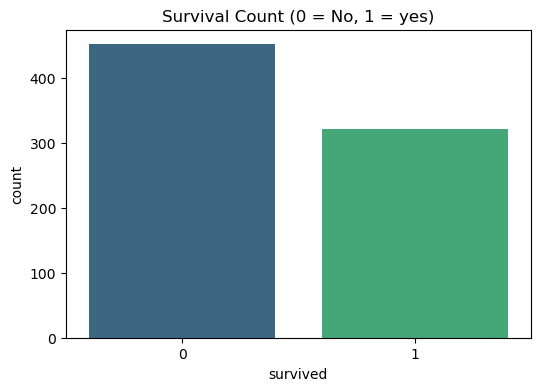

In [71]:
# Visualize the overall distribution of survivors vs non-survivors.
# This helps understand the imbalance in the target class (Survival).
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = "survived", hue = "
plt.title("Survival Count (0 = No, 1 = yes)")
plt.show()

***2. Survival by Gender using Count_Plot***

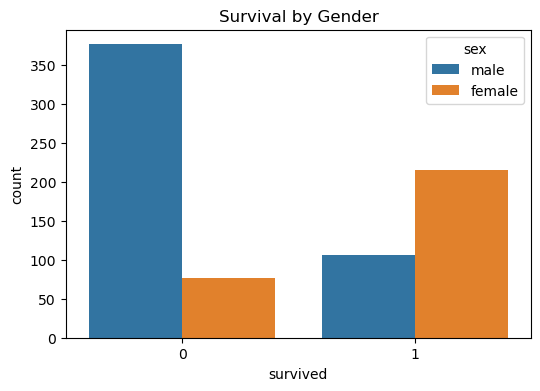

In [72]:
# Compare survival rates between males and females.
# In the Titanic dataset, females generally have a much higher survival rate.
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = "survived", hue = "sex")
plt.title("Survival by Gender")
plt.show()

***3. Survival by Passenger Class using Count_Plot***

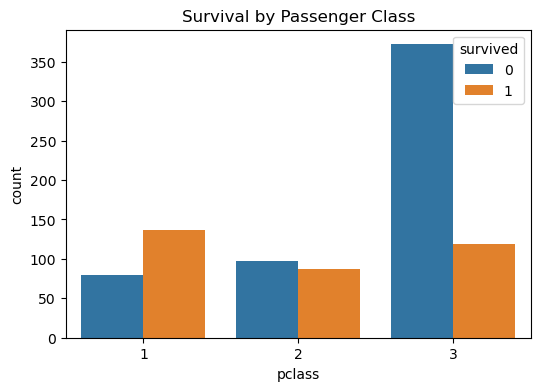

In [15]:
# Analyze how the socio-economic status (Pclass) affected survival chances.
# Usually, First Class passengers had better access to lifeboats.
plt.figure(figsize = (6,4))
sns.countplot(data=df, x = 'pclass', hue = 'survived')
plt.title('Survival by Passenger Class')
plt.show()

***4. Age Distribution using Hist_Plot***

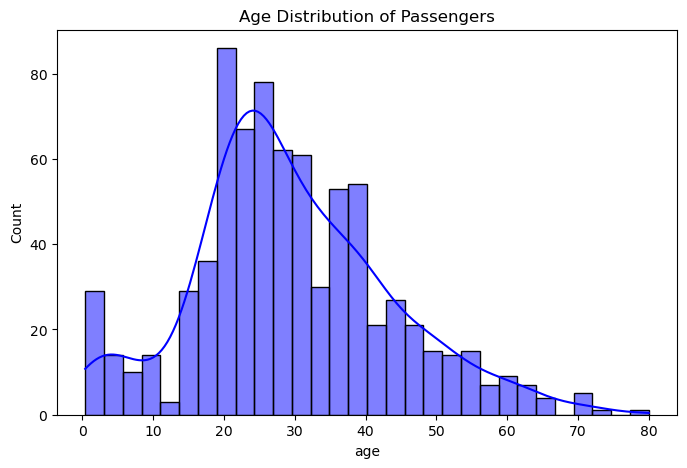

In [85]:
# Show the age spread of all passengers on board.
# The KDE line helps identify the density of different age groups (e.g., many young adults).
plt.figure(figsize = (8,5))
sns.histplot(df['age'].dropna(), kde = True, color = 'blue', bins = 30)
plt.title('Age Distribution of Passengers')
plt.show()

***5. Age vs. Survival using Box_plot***

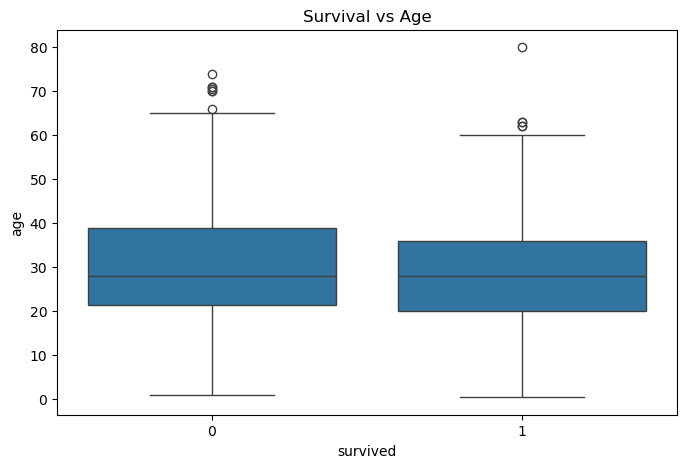

In [76]:
# Use a boxplot to see the median age of those who survived vs. those who did not.
# It helps identify if younger passengers (like children) were prioritized.
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'survived', y = 'age',)
plt.title('Survival vs Age')
plt.show()

***6. Fare Distribution using Hist_Plot***

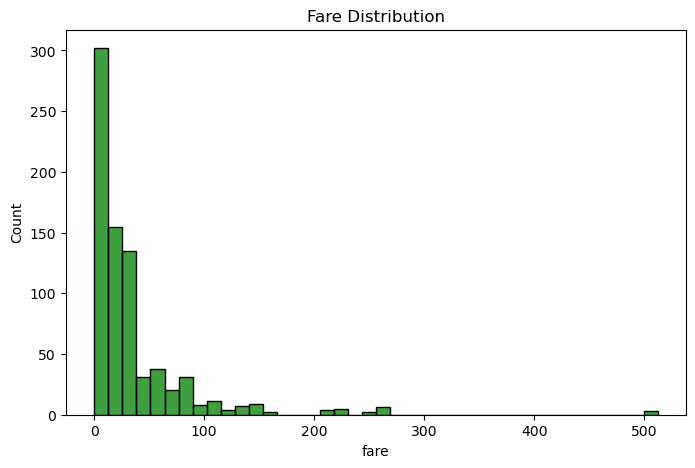

In [77]:
# Examine the ticket price distribution to identify outliers and common fare ranges.
# Most passengers paid low fares, while a few paid very high amounts for luxury cabins.
plt.figure(figsize = (8,5))
sns.histplot(df['fare'], bins = 40, color = 'green')
plt.title('Fare Distribution')
plt.show()

***7. Correlation using Heatmap***

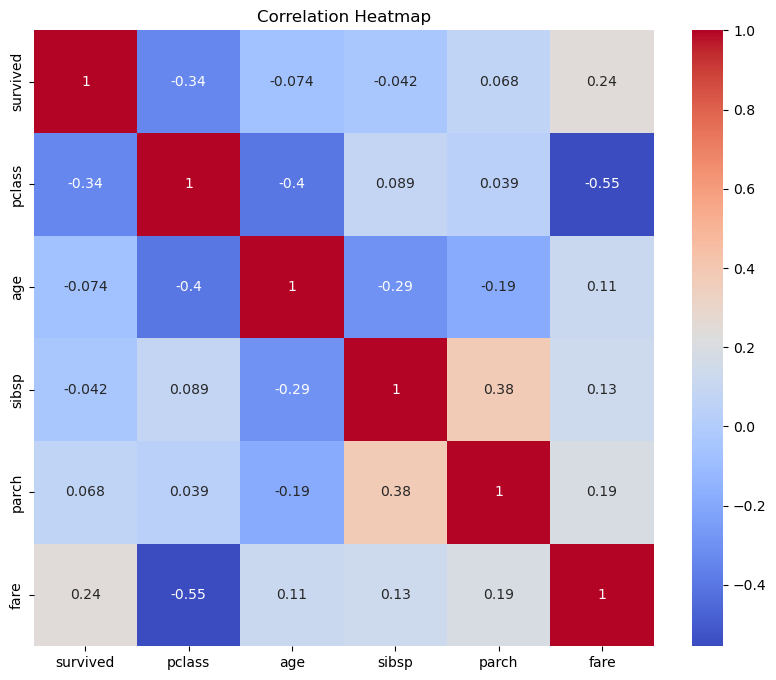

In [87]:
# Calculate the correlation between numerical features like Age, Fare, and Pclass.
# High negative correlation between Pclass and Fare is expected (Lower class = Higher Pclass number).
plt.figure(figsize = (10,8))
numeric_df = df.select_dtypes(include = ['number']) # Sirf numbers wale columns
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***8. Embarkation Port Analysis using Count_Plot***

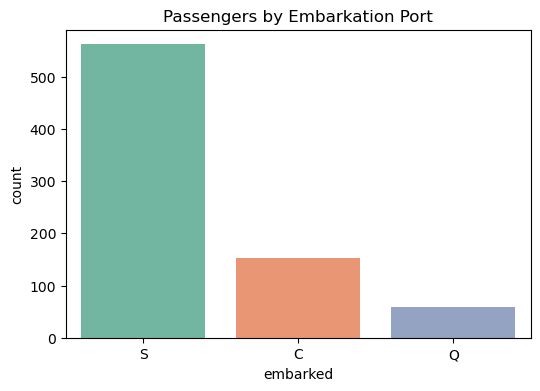

In [86]:
# Count how many passengers boarded from each of the three ports (Southampton, Cherbourg, Queenstown).
# This helps identify the most popular boarding point for the voyage.
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'embarked', hue = 'embarked', palette = 'Set2', legend = False)
plt.title('Passengers by Embarkation Port')
plt.show()

***9. Pie Chart : Survival Distribution***

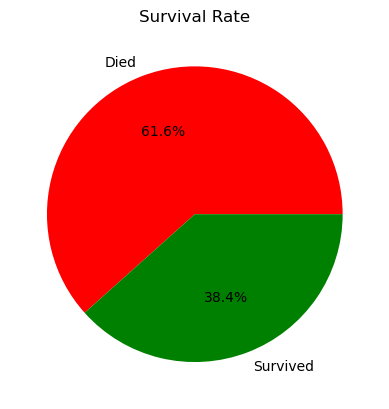

In [4]:
# How many people are survived and how many are died
data = df['survived'].value_counts()
plt.pie(data, labels=['Died', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Rate')
plt.show()

***10. Line Chart : Average Fare by Age***

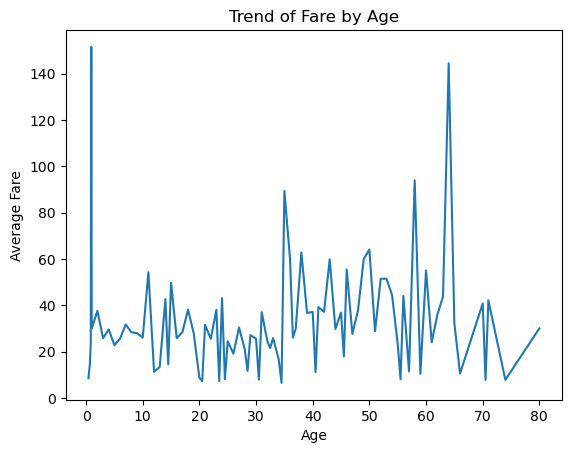

In [5]:
# Average fare trend by age
age_fare = df.groupby('age')['fare'].mean()
plt.plot(age_fare.index, age_fare.values)
plt.xlabel('Age')
plt.ylabel('Average Fare')
plt.title('Trend of Fare by Age')
plt.show()